# Imports

In [17]:
from _config import PATH_TO_CONFIG
from _config import PKL_PROCESSED_STEP2_DTU_SOLAR_STATION
from data_loader import MyDataLoader
from my_config import load_config, MyConfig

# Load (Preprocessed Step 1) DTU Solar Station data

In [18]:
my_config: MyConfig = load_config(PATH_TO_CONFIG)
data_loader = MyDataLoader(my_config)
data_loader.load_data()
data_loader.df.info()
data_loader.df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5260805 entries, 2015-01-01 00:00:00 to 2025-01-01 08:04:00
Freq: min
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DHI                float64
 1   DNI                float64
 2   air_pressure       float64
 3   air_temperature    float64
 4   rain_duration      float64
 5   rain_intensity     float64
 6   relative_humidity  float64
 7   solar_altitude     float64
 8   wind_dir_avg       float64
 9   wind_speed_avg     float64
dtypes: float64(10)
memory usage: 441.5 MB


,DHI,DNI,air_pressure,air_temperature,rain_duration,rain_intensity,relative_humidity,solar_altitude,wind_dir_avg,wind_speed_avg
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lag Features
In order to predict the future values of the target variables, we need to create lagged features. This is done by shifting the values of the features by a certain number of time steps. In this case, we are shifting the values by 60 time steps (1 hour) to predict the future values of the target variables.

In [19]:
data_loader.lag_features()
data_loader.clean_df()
data_loader.df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2424623 entries, 2015-03-14 05:31:00 to 2025-01-01 08:04:00
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DHI                float64
 1   DNI                float64
 2   air_pressure       float64
 3   air_temperature    float64
 4   rain_duration      float64
 5   rain_intensity     float64
 6   relative_humidity  float64
 7   solar_altitude     float64
 8   wind_dir_avg       float64
 9   wind_speed_avg     float64
 10  DNI_lag_60         float64
 11  DNI_lag_1440       float64
 12  DNI_lag_2880       float64
dtypes: float64(13)
memory usage: 259.0 MB


Visualizing that the lagged features are correctly created. \
We see that originally at time t, the df dataframe has the values for the features. \
When looking at the lagged dataframe, we see that the values at time t are now at time t+60 and that the target values are still at time t.

In [20]:
display(data_loader.df.loc['2022-06-12T12:00:00':'2022-06-12T15:00:00'][:5])
display(data_loader.df.loc['2022-06-12T12:00:00':'2022-06-12T15:00:00'][60:65])

,DHI,DNI,air_pressure,air_temperature,rain_duration,rain_intensity,relative_humidity,solar_altitude,wind_dir_avg,wind_speed_avg,DNI_lag_60,DNI_lag_1440,DNI_lag_2880
2022-06-12 12:00:00,286.2,630.421623,1011.0,18.9,0.0,0.0,55.3,56.095320,238.0,4.4,0.0,845.082200,914.127978
2022-06-12 12:01:00,270.7,630.823404,1011.0,19.0,0.0,0.0,55.5,56.044583,263.0,6.5,0.0,847.491024,838.421487
2022-06-12 12:02:00,258.6,698.328352,1011.0,19.0,0.0,0.0,55.9,55.992930,227.0,3.9,0.0,849.299161,854.526214
2022-06-12 12:03:00,252.3,779.535469,1011.0,19.0,0.0,0.0,55.2,55.940367,236.0,3.2,0.0,110.426745,910.537673
2022-06-12 12:04:00,244.9,620.329962,1011.0,19.0,0.0,0.0,56.2,55.886898,328.0,1.8,0.0,728.880106,890.943442


,DHI,DNI,air_pressure,air_temperature,rain_duration,rain_intensity,relative_humidity,solar_altitude,wind_dir_avg,wind_speed_avg,DNI_lag_60,DNI_lag_1440,DNI_lag_2880
2022-06-12 13:00:00,125.40,0.0,1011.0,15.6,20.0,0.0,62.9,51.606081,302.0,4.7,630.421623,779.377308,898.214433
2022-06-12 13:01:00,115.40,0.0,1011.0,15.5,60.0,1.2,62.0,51.509660,302.0,5.7,630.823404,788.486556,898.115677
2022-06-12 13:02:00,99.84,0.0,1011.0,15.4,60.0,0.3,63.7,51.412644,320.0,5.4,698.328352,568.937000,902.415599
2022-06-12 13:03:00,83.67,0.0,1011.0,15.2,60.0,1.7,63.0,51.315038,295.0,5.9,779.535469,1.904451,900.516617
2022-06-12 13:04:00,69.35,0.0,1011.0,15.0,50.0,0.2,63.7,51.216848,322.0,5.0,620.329962,1.667372,903.220128


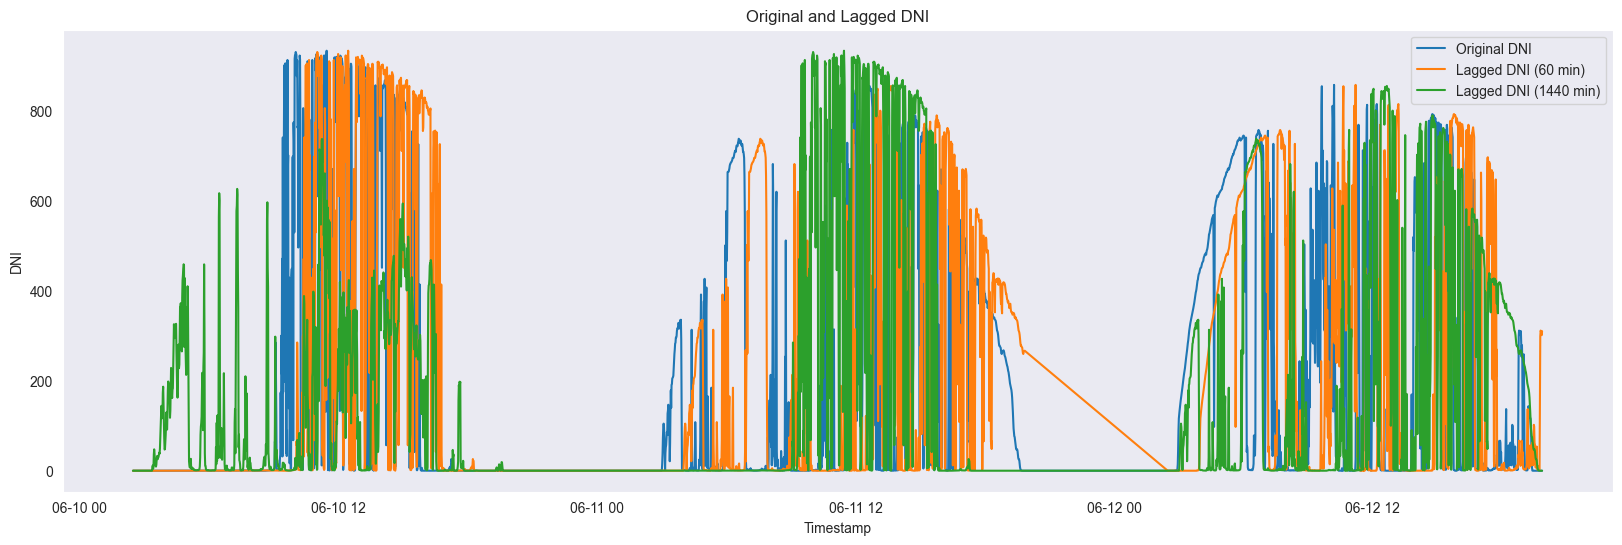

In [29]:
import matplotlib.pyplot as plt

# Select a range of data
start_time = '2022-06-10'
end_time = '2022-06-12'

# Extract the original and lagged feature
fname = my_config.features[0].name
original_feature = data_loader.df.loc[start_time:end_time, fname]
lag = my_config.features[0].lag[0]
lagged_feature = data_loader.df.loc[start_time:end_time, lag.name]
lag_1 = my_config.features[0].lag[1]
lagged_feature_1 = data_loader.df.loc[start_time:end_time, lag_1.name]

# Plot the data
plt.figure(figsize=(20, 6))
plt.plot(original_feature, label=f'Original {fname}')
plt.plot(lagged_feature, label=f'Lagged {fname} ({lag.value} min)')
plt.plot(lagged_feature_1, label=f'Lagged {fname} ({lag_1.value} min)')
plt.title(f'Original and Lagged {fname}')
plt.xlabel('Timestamp')
plt.ylabel(fname)
plt.legend()
plt.grid()
plt.show()

In [39]:
data_loader.df.to_pickle(PKL_PROCESSED_STEP2_DTU_SOLAR_STATION)

In [ ]:
data_loader.df.info()